In [4]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, ClassicalRegister, execute
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# from ibm_quantum_widgets import *
import qiskit.quantum_info as qi
from qiskit.extensions import Initialize
# from qiskit_textbook.tools import random_state
from qiskit.quantum_info import partial_trace, Statevector

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.quantum_info import partial_trace, Statevector
import matplotlib.pyplot as plt

In [5]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education', group='iit-madras-1', project='quantum-computin')

ibmqfactory.load_account:WARNING:2021-07-08 08:33:33,800: Credentials are already in use. The existing account in the session will be replaced.


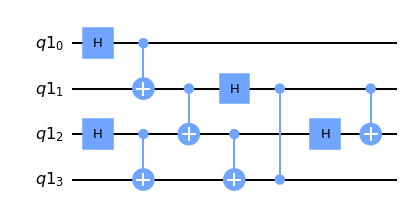

In [6]:
q = QuantumRegister(4)
qc = QuantumCircuit(q)
qc.h(0)
qc.cx(0,1)
qc.h(2)
qc.cx(2,3)
qc.cx(1,2)
qc.cx(2,3)
qc.h(1)
qc.cz(1,3)
qc.h(2)
qc.cx(1,2)
qc.draw('mpl')

In [7]:
# # job = execute(qc, Aer.get_backend('statevector_simulator'))
# # psi_exp = job.result().get_statevector(qc)
# # print(psi_exp)
# target_state_qc = qi.Statevector.from_instruction(qc)
# print(target_state_qc)
backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()
outputstate = result.get_statevector(qc)
print(outputstate)

[ 5.00000000e-01-3.06161700e-17j  0.00000000e+00+0.00000000e+00j
  5.07326818e-18+3.06161700e-17j  0.00000000e+00+0.00000000e+00j
  2.13321079e-17+3.06161700e-17j  0.00000000e+00+0.00000000e+00j
  5.00000000e-01-3.06161700e-17j  0.00000000e+00+0.00000000e+00j
  0.00000000e+00+0.00000000e+00j  5.00000000e-01-9.18485099e-17j
  0.00000000e+00+0.00000000e+00j -8.96901945e-17+3.06161700e-17j
  0.00000000e+00+0.00000000e+00j -7.81934587e-17+3.06161700e-17j
  0.00000000e+00+0.00000000e+00j  5.00000000e-01-9.18485099e-17j]


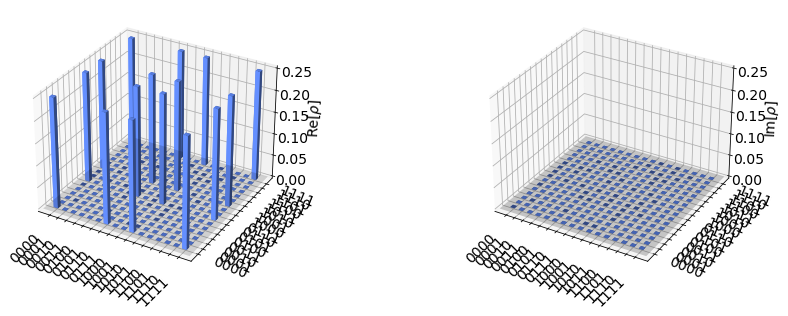

In [8]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

{'1111': 265, '0110': 262, '0000': 234, '1001': 263}


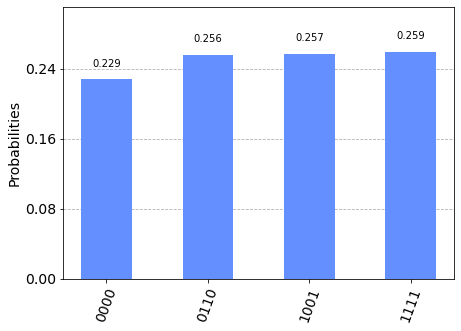

In [62]:
# qc.measure_all()
# aer_sim = Aer.get_backend('aer_simulator')
# result = aer_sim.run(qc).result()
# counts = result.get_counts(qc)
# print(counts)
# plot_histogram(counts)

In [9]:
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter
from qiskit.quantum_info import state_fidelity

In [10]:
qst_swap = state_tomography_circuits(qc, [q[0], q[1], q[2], q[3]])
job = execute(qst_swap, Aer.get_backend('qasm_simulator'), shots=5000)
tomo_swap = StateTomographyFitter(job.result(), qst_swap)
rho_swap = tomo_swap.fit()
F_swap = state_fidelity(outputstate, rho_swap)
print('Fit Fidelity =', F_swap)

/Users/kabirkhanna/opt/anaconda3/lib/python3.7/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:468: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  prep += circuit
/Users/kabirkhanna/opt/anaconda3/lib/python3.7/site-packages/qiskit/circuit/quantumcircuit.py:876: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)
/Users/kabirkhanna/opt/anaconda3/lib/python3.7/site-packages/qiskit/ignis/verification/tomography/basis/circuits.py:478: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  circ 

Fit Fidelity = 0.9935682327289292


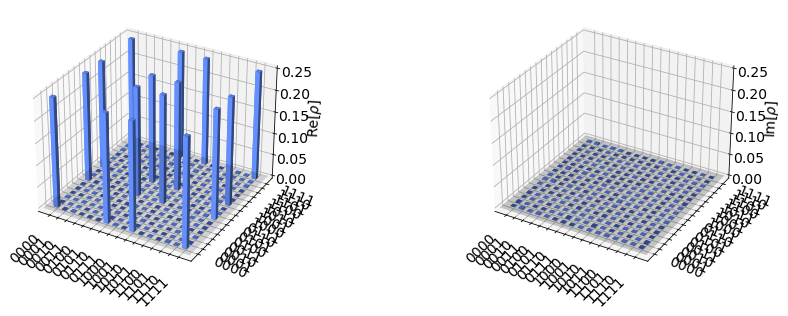

In [11]:
plot_state_city(rho_swap)

In [10]:
# job = execute(qst_swap, Aer.get_backend('qasm_simulator'), shots=5000)
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 4 and
                                       not b.configuration().simulator and b.status().operational==True and b.configuration().max_experiments>=81))
print("Running on backend:", backend)
t_qc = transpile(qst_swap, backend, optimization_level=3)
job = backend.run(t_qc)
job_monitor(job)
exp_result = job.result()
tomo_swap = StateTomographyFitter(job.result(), t_qc)
rho_swap = tomo_swap.fit()
F_swap = state_fidelity(outputstate, rho_swap)
print('Fit Fidelity =', F_swap)

Running on backend: ibmq_jakarta
Job Status: job has successfully run
Fit Fidelity = 0.4964087393154619


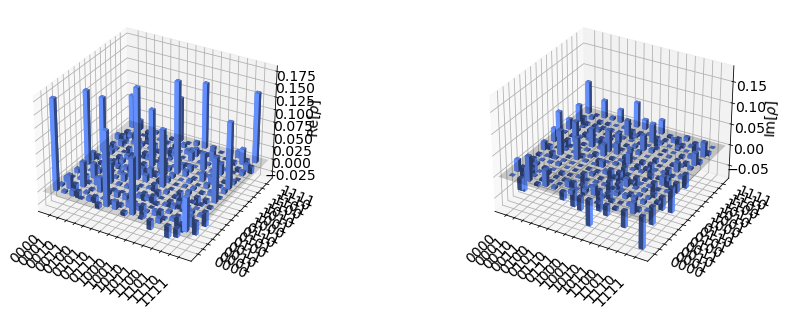

In [11]:
plot_state_city(rho_swap)